In [18]:
import tensorflow as tf

In [1]:
import zipfile, os

In [4]:
local_zip = 'messy-vs-clean-room.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('tmp')
zip_ref.close()

In [5]:
base_directory = 'tmp/images/'
train_dir = os.path.join(base_directory, 'train')
validation_dir = os.path.join(base_directory, 'val')

In [7]:
os.listdir('tmp/images/train')

['messy', 'clean']

In [9]:
os.listdir('tmp/images/val')

['messy', 'clean']

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)


In [15]:
print(train_datagen)


In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (150,150),
    batch_size = 4,
    class_mode = 'binary'
)

Found 192 images belonging to 2 classes.


In [17]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size = (150,150),
    batch_size = 4,
    class_mode = 'binary'
)

Found 20 images belonging to 2 classes.


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'), 
    tf.keras.layers.Dense(1, activation = 'sigmoid')


])



In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [22]:
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

In [24]:
model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2
)

Epoch 1/20
25/25 - 4s - loss: 0.6989 - accuracy: 0.5200 - val_loss: 0.6928 - val_accuracy: 0.5000 - 4s/epoch - 178ms/step
Epoch 2/20
25/25 - 4s - loss: 0.6948 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000 - 4s/epoch - 163ms/step
Epoch 3/20
25/25 - 3s - loss: 0.6932 - accuracy: 0.5100 - val_loss: 0.6931 - val_accuracy: 0.5000 - 3s/epoch - 130ms/step
Epoch 4/20
25/25 - 3s - loss: 0.6931 - accuracy: 0.5100 - val_loss: 0.6925 - val_accuracy: 0.5000 - 3s/epoch - 114ms/step
Epoch 5/20
25/25 - 3s - loss: 0.6931 - accuracy: 0.4600 - val_loss: 0.6621 - val_accuracy: 0.5000 - 3s/epoch - 111ms/step
Epoch 6/20
25/25 - 4s - loss: 0.6995 - accuracy: 0.4700 - val_loss: 0.6927 - val_accuracy: 0.5000 - 4s/epoch - 144ms/step
Epoch 7/20
25/25 - 4s - loss: 0.6985 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5000 - 4s/epoch - 159ms/step
Epoch 8/20
25/25 - 4s - loss: 0.6933 - accuracy: 0.4800 - val_loss: 0.6926 - val_accuracy: 0.5000 - 4s/epoch - 169ms/step
Epoch 9/20
25/25 - 3s - 

In [27]:
from PIL import Image

img = Image.open('image1.jpg')

1/1 [==============================] - 1s 587ms/step
image1.jpg
messy


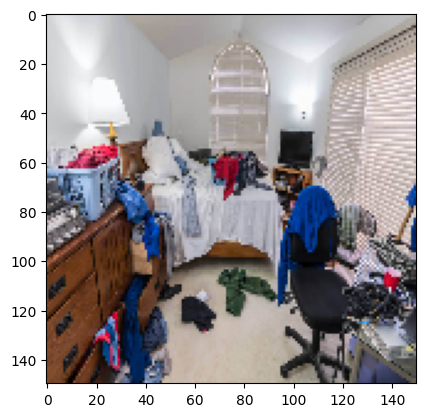

In [28]:
import numpy as np
# from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = 'image1.jpg'
img = image.load_img(path, target_size=(150,150))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)  
print(path)
if classes==0:
 print('clean')
else:
 print('messy')

1/1 [==============================] - 0s 31ms/step
image2.jpg
messy


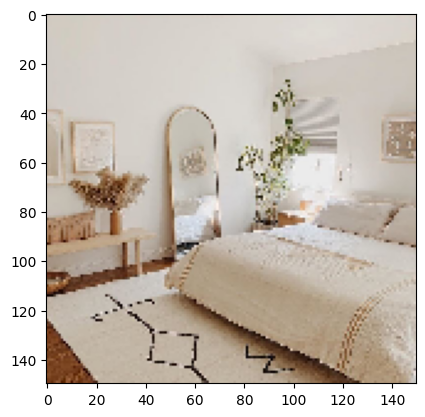

In [30]:
path = 'image2.jpg'
img = image.load_img(path, target_size=(150,150))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)  
print(path)
if classes==0:
 print('clean')
else:
 print('messy')

In [25]:
import numpy as np
# from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# %matplotlib inline
 
# uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes==0:
   print('clean')
  else:
   print('messy')


ModuleNotFoundError: No module named 'google.colab'